AttributeError: Line2D.set() got an unexpected keyword argument 'tooltip'

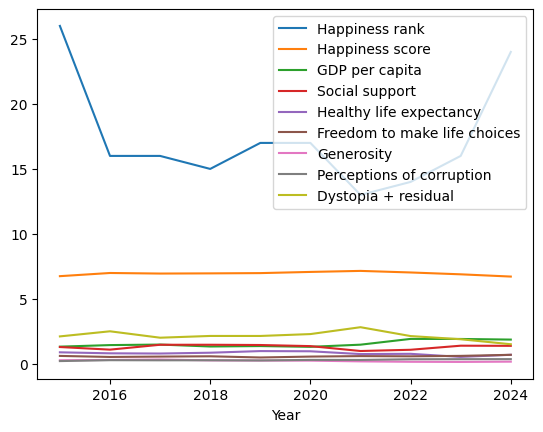

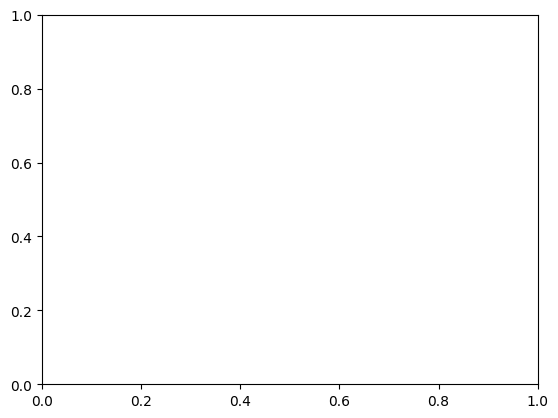

In [18]:
# load results.csv multiindex csv and plot the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../srilanka/data/happiness/results.csv', index_col=[0, 1])

# plot the data for germany
df.xs('Germany', level=1).plot()
# add tooltips on mouseover
df.xs('Germany', level=1).plot(tooltip=['x', 'y'])


In [27]:
import altair as alt
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'x': np.linspace(0, 100, 200),
    'y1': np.random.rand(200) * 10,
    'y2': np.random.rand(200) * 15,
    'y3': np.random.rand(200) * 20,
    'y4': np.random.rand(200) * 25,
})

# Melt data for easier plotting
df = df.melt('x', var_name='series', value_name='y')

# Slider parameter
slider = alt.param(name='slider', bind=alt.binding_range(min=0, max=100, step=1), value=50)

# Line charts with tooltips
line_chart = alt.Chart(df).mark_line().encode(
    x='x',
    y=alt.Y('y', scale=alt.Scale(zero=False)),
    color='series:N',
    tooltip=['x', 'y', 'series']
).transform_filter(
    f"datum.x <= slider"  # Filter data based on the slider
).properties(
    width=300,
    height=100
)

# Combine charts with slider
final_chart = alt.vconcat(
    line_chart,
    alt.Chart(pd.DataFrame({'text': ['Adjust the slider']})).mark_text(
        align='left', baseline='middle', dx=5
    ).encode(
        text='text:N'
    )
).add_params(
    slider
)

final_chart


alt.VConcatChart(...)

In [29]:
import altair as alt
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'x': np.linspace(0, 100, 200),
    'y1': np.random.rand(200) * 10,
    'y2': np.random.rand(200) * 15,
    'y3': np.random.rand(200) * 20,
    'y4': np.random.rand(200) * 25,
})

# Melt data for easier plotting
df = df.melt('x', var_name='series', value_name='y')

# Slider parameter
slider = alt.param(name='slider', bind=alt.binding_range(min=0, max=100, step=1), value=50)

# Line chart template for vertical arrangement
def make_vertical_chart(series_name):
    return alt.Chart(df[df['series'] == series_name]).mark_line().encode(
        x=alt.Y('y', title=series_name),  # Make 'y' the vertical axis
        y='x',  # Make 'x' the horizontal axis
        tooltip=['x', 'y']
    ).transform_filter(
        f"datum.x <= slider"  # Filter data based on slider
    ).properties(
        height=100,
        width=300
    )

# Create four vertical charts
charts = [
    make_vertical_chart('y1'),
    make_vertical_chart('y2'),
    make_vertical_chart('y3'),
    make_vertical_chart('y4')
]

# Combine all charts vertically with a slider and text annotation
final_chart = alt.vconcat(
    alt.vconcat(*charts),
    alt.Chart(pd.DataFrame({'text': ['Adjust the slider']})).mark_text(
        align='left', baseline='middle', dx=5
    ).encode(
        text='text:N'
    )
).add_params(
    slider
)

final_chart


alt.VConcatChart(...)